### General Information
#### Data Set Information
> Machine learning is used in high-energy physics experiments to search for the signatures of exotic particles. These signatures are learned from Monte Carlo simulations of the collisions that produce these particles and the resulting decay products. In each of the three data sets here, the goal is to separate particle-producing collisions from a background source. [...] The data is separated into a training set of 7 million examples and a test set of 3.5 million for each.

([UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/HEPMASS#))

#### Attribute Information
> The first column is the class label (1 for signal, 0 for background), followed by the 27 normalized features (22 low-level features then 5 high-level features), and a 28th mass feature.

([UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/HEPMASS#))

| label |      f0      |       f1     | ... |      f25     |      f26     |            mass              |
|:-----:|:------------:|:------------:|:---:|:------------:|:------------:|:----------------------------:|
| {0,1} | $\mathbb{R}$ | $\mathbb{R}$ | ... | $\mathbb{R}$ | $\mathbb{R}$ | {500, 750, 1000, 1250, 1500} |

### Statistics

In [59]:
import dask.dataframe as dd
data = dd.read_csv('data/all_test.csv')
data.rename(index=str, columns={'# label': 'label'})
data.drop(['label', 'mass'], axis=1).compute().describe() # NOTE this might freeze your computer for a while :)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26
count,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,...,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06,3.500000e+06
mean,1.677517e-02,-5.882622e-04,-2.703736e-04,1.170023e-02,-5.277635e-05,2.556547e-03,1.815479e-02,2.004137e-04,-1.961444e-04,-6.334786e-03,...,4.677550e-03,1.147895e-02,-8.455537e-04,4.723695e-05,-3.806618e-05,1.228957e-02,9.204575e-03,6.408718e-03,-8.033496e-04,1.511048e-02
std,1.005118e+00,9.972289e-01,9.996684e-01,9.945796e-01,9.997896e-01,1.000173e+00,9.869383e-01,9.962253e-01,9.999170e-01,1.001789e+00,...,1.000950e+00,1.002650e+00,1.000688e+00,1.000289e+00,9.999775e-01,1.009107e+00,1.003820e+00,1.011991e+00,9.850043e-01,9.818347e-01
min,-1.960549e+00,-2.365346e+00,-1.732165e+00,-8.895442e+00,-1.732137e+00,-1.054221e+00,-2.932880e+00,-2.757863e+00,-1.732359e+00,-1.325801e+00,...,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.612524e+00,-4.271224e+00,-1.678043e+01,-2.800613e+00,-2.654076e+00
25%,-7.284369e-01,-7.345650e-01,-8.662397e-01,-6.083473e-01,-8.656481e-01,-1.054221e+00,-7.570114e-01,-7.015647e-01,-8.661835e-01,-1.325801e+00,...,-8.154401e-01,-7.430429e-01,-7.223305e-01,-8.665953e-01,-5.736825e-01,-5.409764e-01,-5.113137e-01,-3.543733e-01,-6.924303e-01,-7.937275e-01
50%,-3.874749e-02,-2.883120e-04,-1.403588e-03,2.056307e-02,1.922509e-04,-5.983562e-03,-1.508666e-01,5.040040e-04,2.682766e-04,7.542607e-01,...,-8.154401e-01,-9.024961e-02,-8.028708e-04,3.705295e-04,-5.736825e-01,-1.602321e-01,-3.142920e-01,-3.265146e-01,-3.561128e-01,-8.932617e-02
75%,6.912319e-01,7.329645e-01,8.650876e-01,6.797863e-01,8.653622e-01,8.504885e-01,7.687392e-01,7.013005e-01,8.657596e-01,7.542607e-01,...,1.226331e+00,6.419688e-01,7.207651e-01,8.661937e-01,-5.736825e-01,4.809416e-01,1.620571e-01,-2.329328e-01,4.770004e-01,7.598977e-01
max,4.037127e+00,2.365296e+00,1.732370e+00,3.622688e+00,1.731978e+00,4.482618e+00,3.933915e+00,2.758563e+00,1.731450e+00,7.542607e-01,...,1.226331e+00,5.537915e+00,2.282209e+00,1.732740e+00,1.743123e+00,7.326623e+00,9.357253e+00,1.555813e+01,5.008558e+00,4.613183e+00


<IPython.core.display.Javascript object>


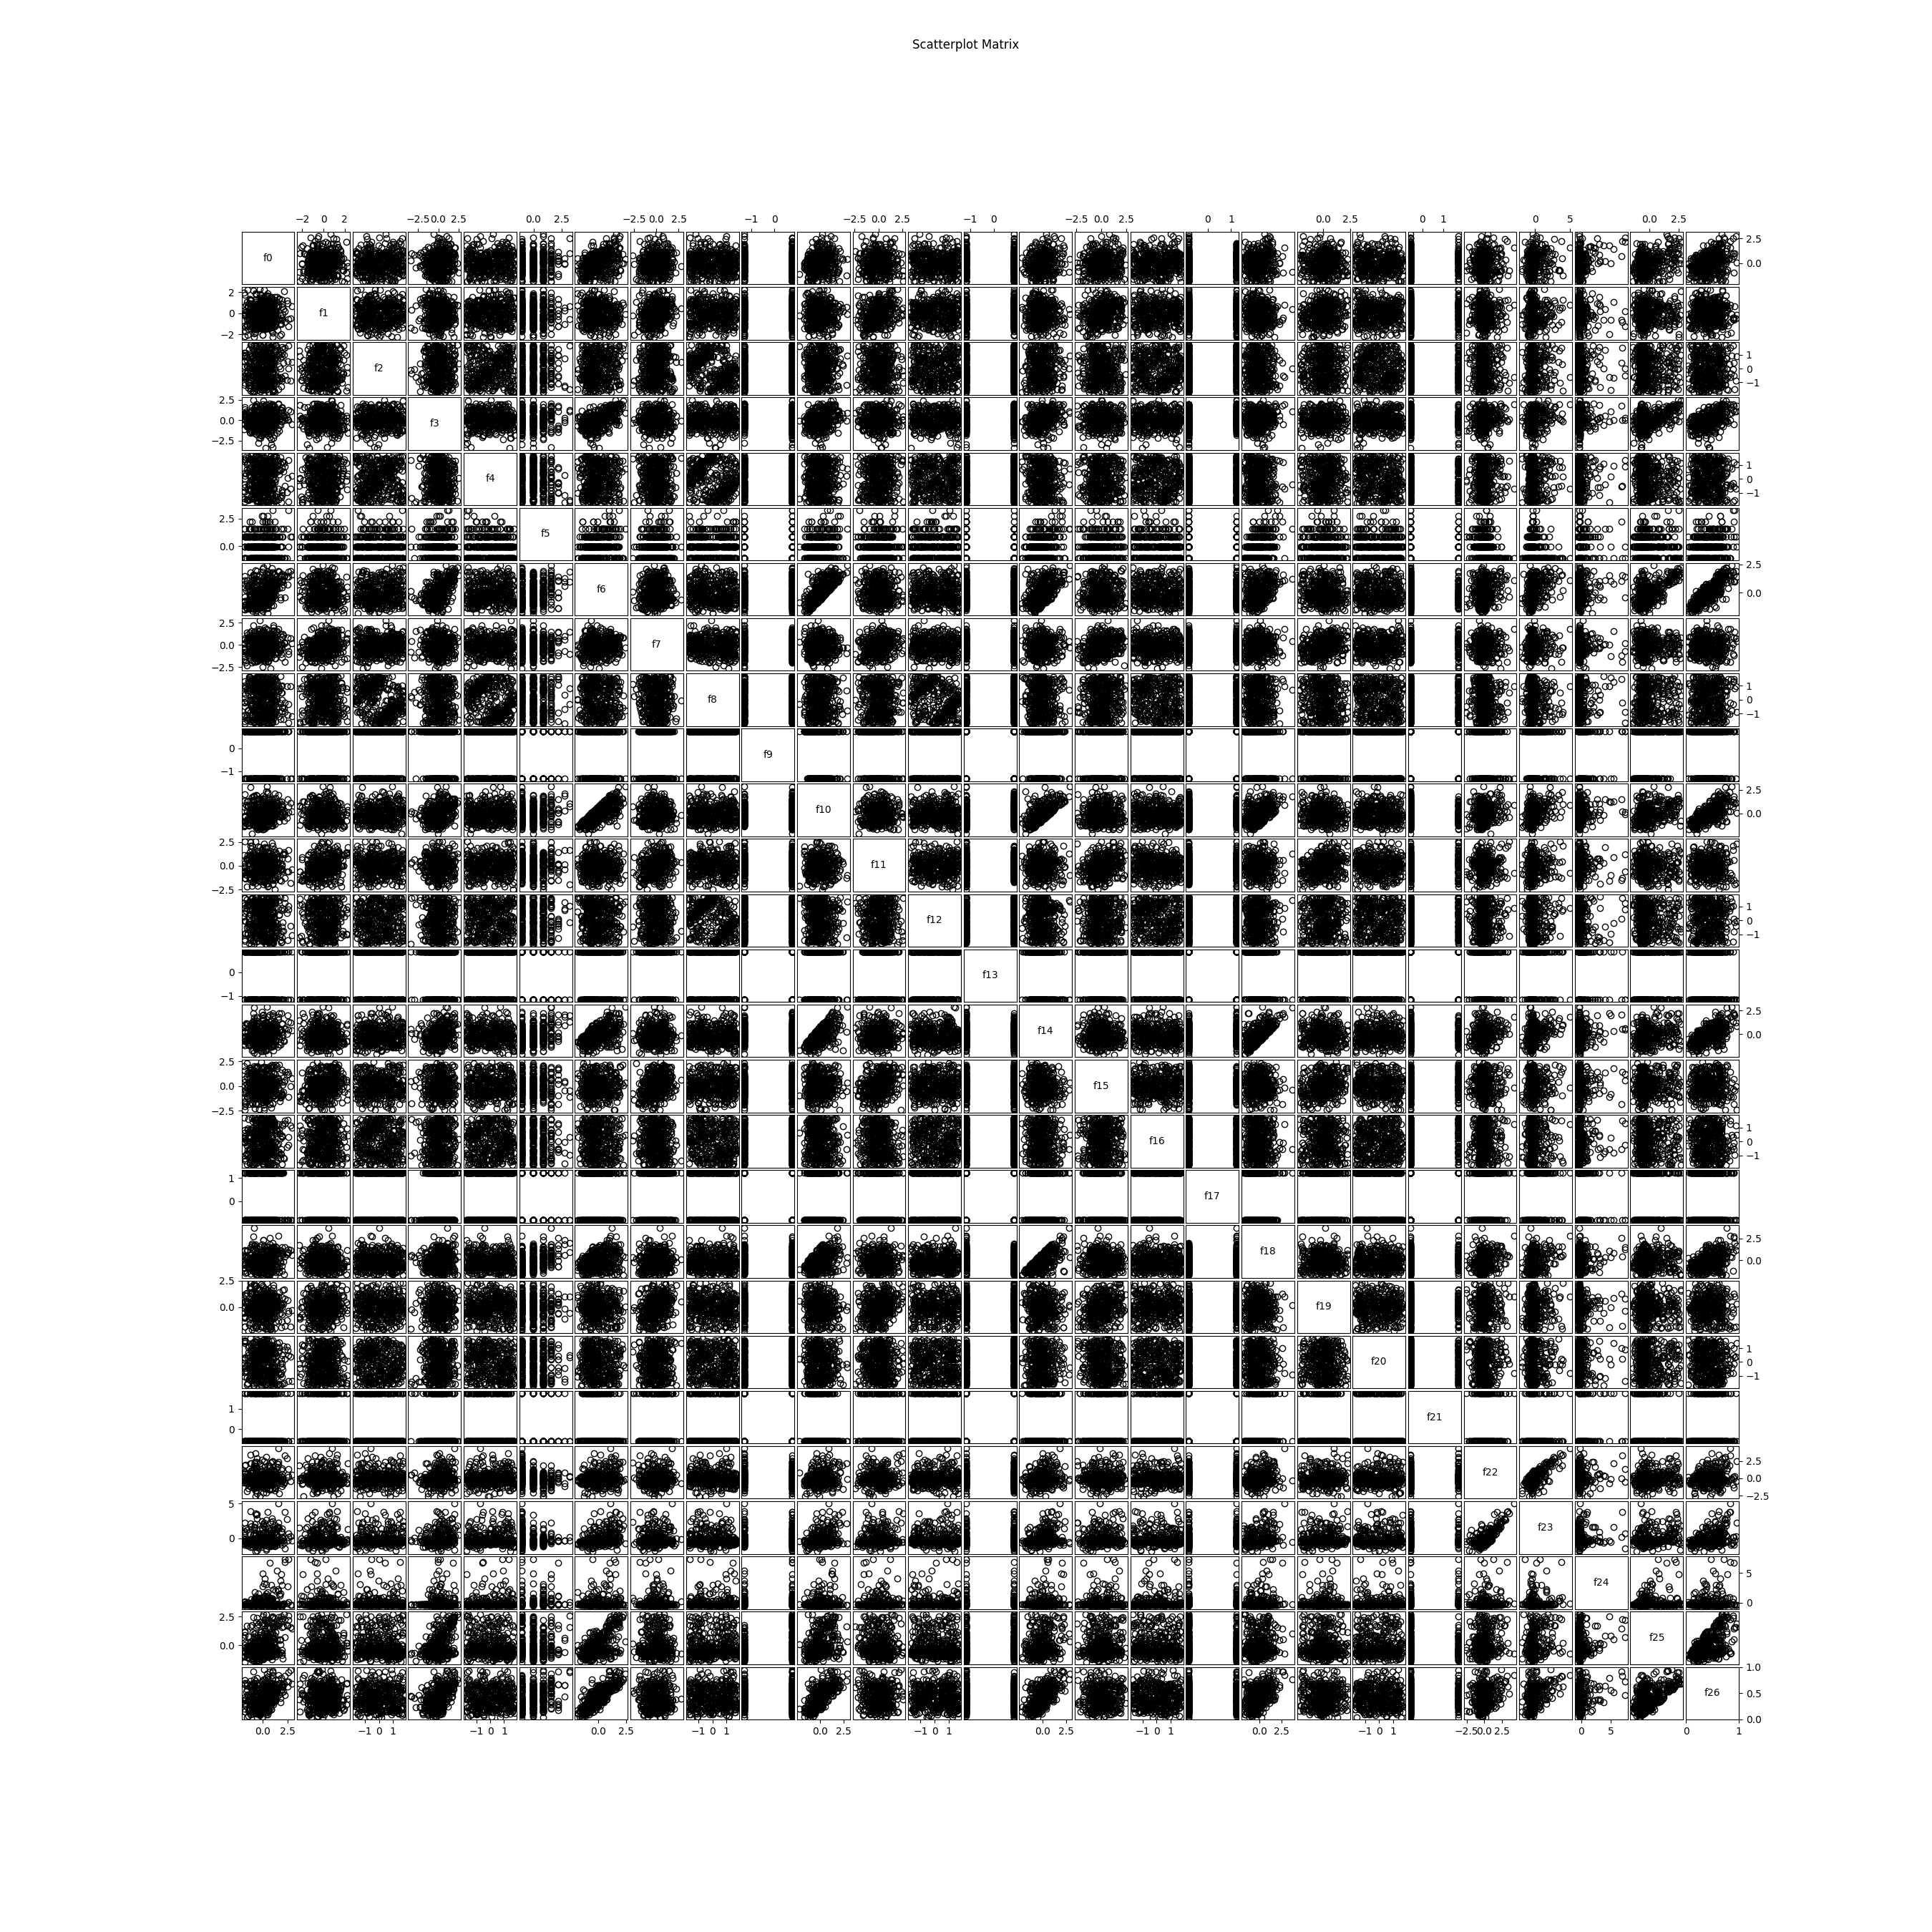

In [2]:
def scatterplot_matrix(data, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    
    numvars = data.columns.__len__()
    columns = data.columns
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(27,27))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    
    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

    # Plot the data.
    for i, j in zip(*np.triu_indices_from(axes, k=1)):
        for x, y in [(i,j), (j,i)]:
            axes[y,x].plot(data[columns[x]], data[columns[y]], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(columns):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
    for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
        axes[j,i].xaxis.set_visible(True)
        axes[i,j].yaxis.set_visible(True)

    return fig

#---------------------------------------------------------------------------------
import dask.dataframe as dd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import itertools
dask_df = dd.read_csv('data/all_test.csv')
subsample = dask_df.sample(0.0001).compute()
fig = scatterplot_matrix(subsample.drop(['# label', 'mass'], axis=1),
            linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Scatterplot Matrix')
plt.show()

<IPython.core.display.Javascript object>


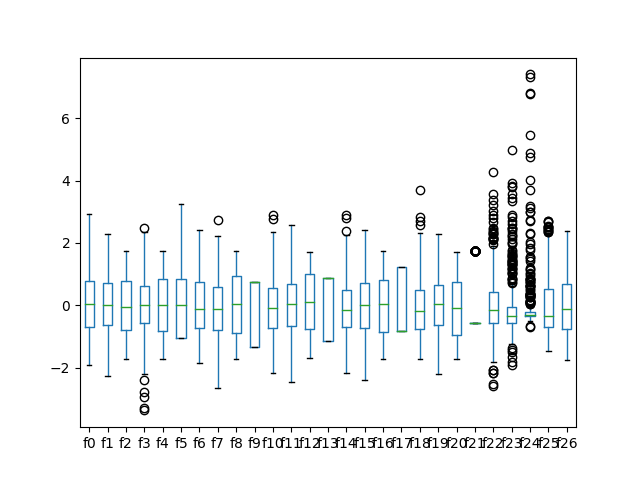

In [16]:
subsample.drop(['# label', 'mass'], axis=1).plot.box()